In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points = np.load('points_mm.npy')
fields = np.load('fields_mm.npy')
assert points.shape == fields.shape

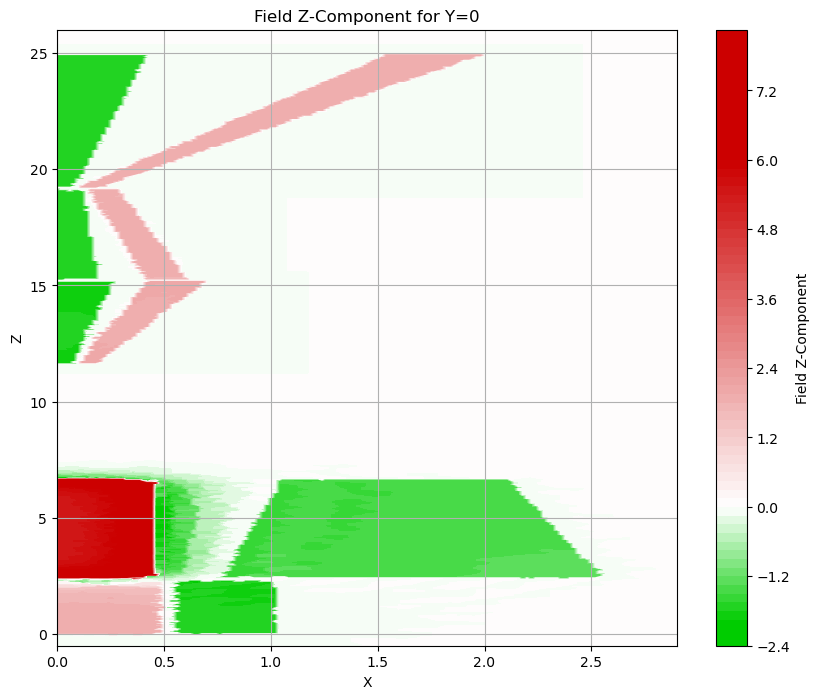

In [3]:
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import numpy as np
import matplotlib.pyplot as plt

# Filter points where y is approximately 0
tolerance = 1e-6
mask = np.abs(points[:, 1]) < tolerance
points_y0 = points[mask]
fields_y0 = fields[mask]

# Extract x and z coordinates for the plot
x = points_y0[:, 0]
z = points_y0[:, 2]

# Use z-component of the field instead of magnitude
field_values = fields_y0[:, 1]  # Using z-component which can be +/-

# Create custom colormap: green for negative, white at zero, red for positive
colors = [(0, 0.8, 0), (1, 1, 1), (0.8, 0, 0)]
custom_cmap = LinearSegmentedColormap.from_list('green_white_red', colors)

# Create a normalization that centers white color at value 0
norm = TwoSlopeNorm(vmin=-2, vcenter=0, vmax=6)

# Create the tricontourf plot with many more levels for a more continuous look
plt.figure(figsize=(10, 8))
# Using 100 levels instead of 20 for a more continuous appearance
tcf = plt.tricontourf(x, z, field_values, cmap=custom_cmap, levels=70, norm=norm)
plt.colorbar(tcf, label='Field Z-Component')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Field Z-Component for Y=0')
plt.grid(True)
plt.show()

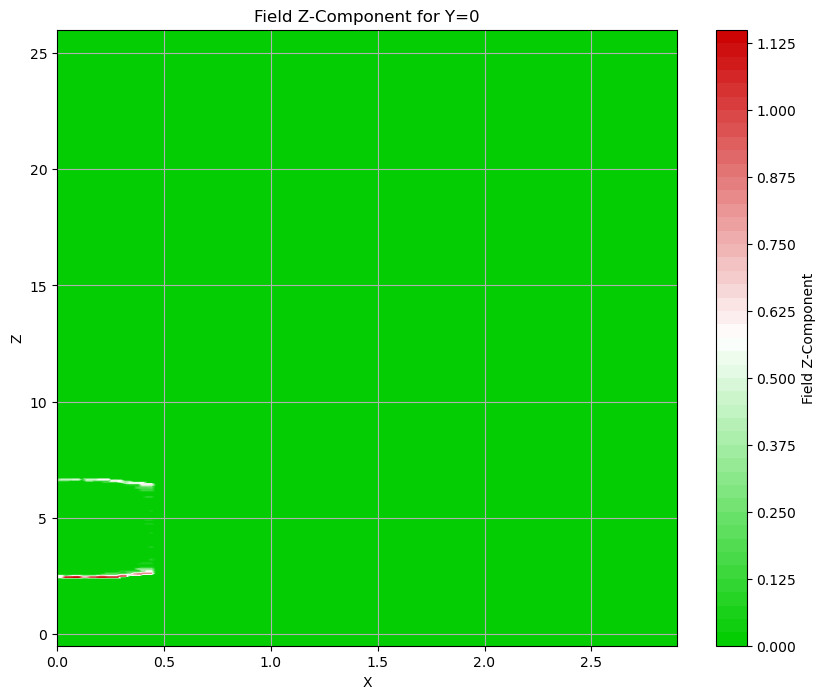

In [4]:
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import numpy as np
import matplotlib.pyplot as plt

# Filter points where y is approximately 0
tolerance = 1e-6
mask = np.abs(points[:, 1]) < tolerance
points_y0 = points[mask]
fields_y0 = fields[mask]

# Extract x and z coordinates for the plot
x = points_y0[:, 0]
z = points_y0[:, 2]

# Use z-component of the field instead of magnitude
field_values = np.abs(fields_y0[:, 1])-7  # Using z-component which can be +/-
field_values = np.maximum(0, field_values)

# Create a normalization that centers white color at value 0
norm = TwoSlopeNorm(vmin=-0., vcenter=0.1, vmax=2)

# Create the tricontourf plot with many more levels for a more continuous look
plt.figure(figsize=(10, 8))
# Using 100 levels instead of 20 for a more continuous appearance
tcf = plt.tricontourf(x, z, field_values, cmap=custom_cmap, levels=50)#, norm=norm)
plt.colorbar(tcf, label='Field Z-Component')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Field Z-Component for Y=0')
plt.grid(True)
plt.show()